In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('Week6Q1.csv')
X = data[['Experience']].values
y = data['Salary'].values

In [3]:
max_iter_list = [10,20,30,40,50,60,70,80,90,100]
errors = []

In [4]:
for max_iter in max_iter_list:
    model = SGDRegressor(max_iter=max_iter, tol=None, penalty=None, eta0=0.01, random_state=0)
    model.fit(X, y)
    y_pred = model.predict(X)
    error = mean_squared_error(y, y_pred)
    errors.append(error)

In [5]:
model.intercept_[0]

0.33709571335757976

In [6]:
model.coef_[0]

1.4538816689104137

In [7]:
error

0.31959988332326317

In [8]:
errors

[0.33014568750808054,
 0.32657729388694484,
 0.32533222670879747,
 0.32426051878033285,
 0.3233049689456557,
 0.3224390950489789,
 0.3216460294773402,
 0.3209139654381396,
 0.32023416179219,
 0.31959988332326317]

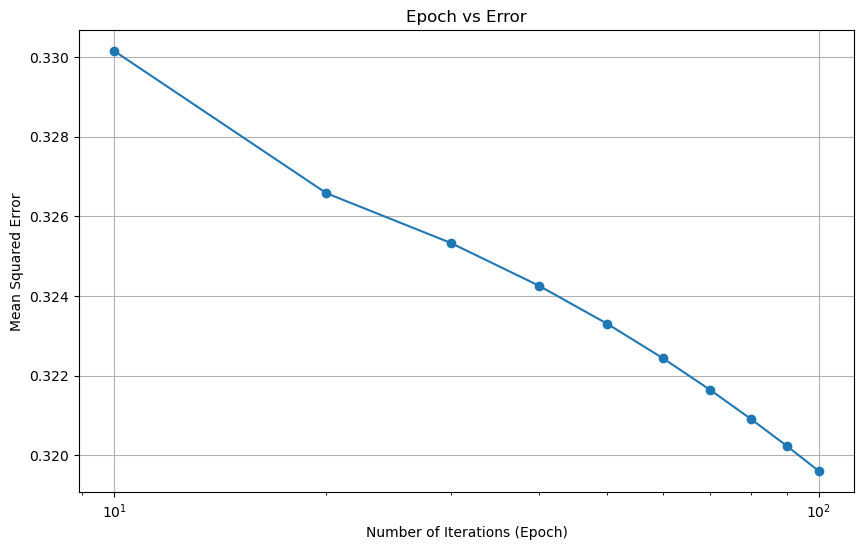

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(max_iter_list, errors, marker='o')
plt.xscale('log')
plt.xlabel('Number of Iterations (Epoch)')
plt.ylabel('Mean Squared Error')
plt.title('Epoch vs Error')
plt.grid(True)
plt.show()

## Q2

In [10]:
b = 1.1
beta_values = [0.1, 1.5, 0.8]
errors = []

In [11]:
for beta in beta_values:
    y_pred = b + beta * X.flatten()
    error = mean_squared_error(y, y_pred)
    errors.append(error)

In [12]:
beta

0.8

In [13]:
b

1.1

In [14]:
error

1.8960999999999995

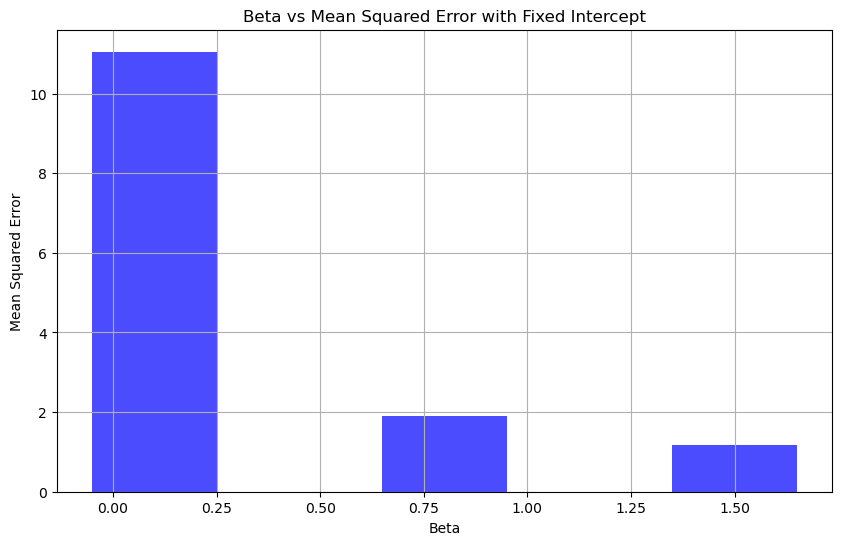

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(beta_values, errors, width=0.3, color='b', alpha=0.7)
plt.xlabel('Beta')
plt.ylabel('Mean Squared Error')
plt.title('Beta vs Mean Squared Error with Fixed Intercept')
plt.grid(True)
plt.show()

## Q3

In [16]:
n_epochs = 5
max_iter = 60

In [17]:
sgd_regressor = SGDRegressor(max_iter=max_iter, tol=None, penalty=None, eta0=0.01, random_state=0, verbose=1)

In [18]:
errors = []
for epoch in range(n_epochs):
    sgd_regressor.fit(X, y)
    y_pred = sgd_regressor.predict(X)
    error = mean_squared_error(y, y_pred)
    print(error)
    errors.append(error)

-- Epoch 1
Norm: 0.80, NNZs: 1, Bias: 0.244658, T: 12, Avg. loss: 5.511380
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.07, NNZs: 1, Bias: 0.329652, T: 24, Avg. loss: 1.449862
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.21, NNZs: 1, Bias: 0.372469, T: 36, Avg. loss: 0.609471
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.28, NNZs: 1, Bias: 0.395888, T: 48, Avg. loss: 0.338458
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.33, NNZs: 1, Bias: 0.409100, T: 60, Avg. loss: 0.240451
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.36, NNZs: 1, Bias: 0.415614, T: 72, Avg. loss: 0.201248
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.38, NNZs: 1, Bias: 0.420860, T: 84, Avg. loss: 0.184517
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.39, NNZs: 1, Bias: 0.422968, T: 96, Avg. loss: 0.176110
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.40, NNZs: 1, Bias: 0.424362, T: 108, Avg. loss: 0.172377
Total training time: 0.00 seconds.
-- Epoch 

In [19]:
sgd_regressor.intercept_[0]

0.3702869255083966

In [20]:
sgd_regressor.coef_[0]

1.4430480361936737

In [21]:
error

0.3224390950489789

In [22]:
errors

[0.3224390950489789,
 0.3224390950489789,
 0.3224390950489789,
 0.3224390950489789,
 0.3224390950489789]

In [23]:
sgd_regressor_sklearn = SGDRegressor(max_iter=max_iter, tol=None, penalty=None, eta0=0.01, random_state=0)
sgd_regressor_sklearn.fit(X, y)
y_pred_sklearn = sgd_regressor_sklearn.predict(X)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)

In [24]:
sgd_regressor_sklearn.intercept_[0]

0.3702869255083966

In [25]:
sgd_regressor_sklearn.coef_[0]

1.4430480361936737

In [26]:
beta_range = np.arange(0, 1.51, 0.01)
errors_custom = []

In [27]:
for beta in beta_range:
    y_pred_custom = beta * X.flatten() + sgd_regressor.intercept_[0]
    error_custom = mean_squared_error(y, y_pred_custom)
    errors_custom.append(error_custom)

In [28]:
errors_sklearn = [mean_squared_error(y, sgd_regressor_sklearn.predict(X))] * len(beta_range)

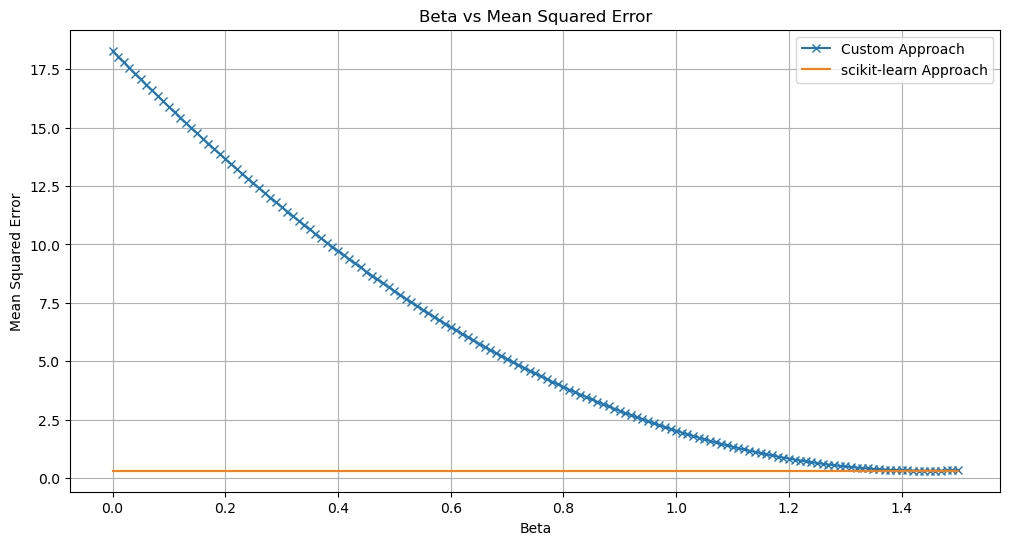

In [29]:

plt.figure(figsize=(12, 6))
plt.plot(beta_range, errors_custom, label='Custom Approach', marker='x')
plt.plot(beta_range, errors_sklearn, label='scikit-learn Approach')
plt.xlabel('Beta')
plt.ylabel('Mean Squared Error')
plt.title('Beta vs Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
x = np.linspace(0.01, 0.99, 100)
y1 = -np.log(x)
y2 = -np.log(1 - x)

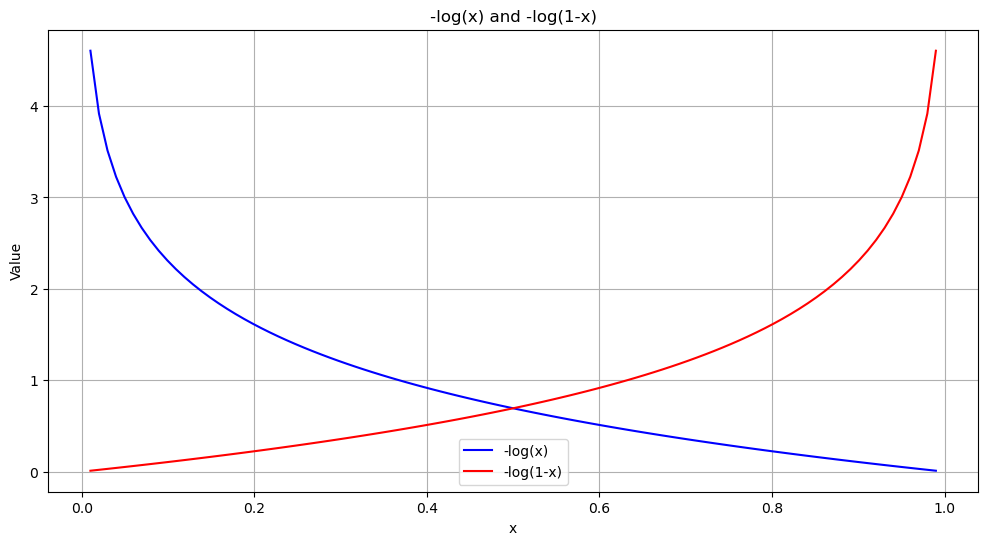

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(x, y1, label='-log(x)', color='blue')
plt.plot(x, y2, label='-log(1-x)', color='red')
plt.xlabel('x')
plt.ylabel('Value')
plt.title('-log(x) and -log(1-x)')
plt.legend()
plt.grid(True)
plt.show()

## Q4

In [32]:
x_pos = np.array([1, 2, 4, 3, 5])
y_pos = np.array([1, 3, 3, 2, 5])
x_neg = np.array([1, 2, 3, 4, 5])
y_neg = np.array([10, 8, 6, 4, 2])

In [33]:
learning_rate = 0.01
epochs = 1000

In [34]:
theta_0_pos = 0
theta_1_pos = 0
theta_0_history_pos = []
theta_1_history_pos = []
mse_history_pos = []

In [35]:
for _ in range(epochs):
    y_pred_pos = theta_0_pos + theta_1_pos * x_pos
    error_pos = y_pred_pos - y_pos
    cost_pos = (1 / len(x_pos)) * np.sum(error_pos ** 2)
    gradient_0_pos = (2 / len(x_pos)) * np.sum(error_pos)
    gradient_1_pos = (2 / len(x_pos)) * np.sum(error_pos * x_pos)
    theta_0_pos -= learning_rate * gradient_0_pos
    theta_1_pos -= learning_rate * gradient_1_pos
    theta_0_history_pos.append(theta_0_pos)
    theta_1_history_pos.append(theta_1_pos)
    mse_history_pos.append(cost_pos)

In [36]:
theta_0_neg = 0
theta_1_neg = 0
theta_0_history_neg = []
theta_1_history_neg = []
mse_history_neg = []

In [37]:
for _ in range(epochs):
    y_pred_neg = theta_0_neg + theta_1_neg * x_neg
    error_neg = y_pred_neg - y_neg
    cost_neg = (1 / len(x_neg)) * np.sum(error_neg ** 2)
    gradient_0_neg = (2 / len(x_neg)) * np.sum(error_neg)
    gradient_1_neg = (2 / len(x_neg)) * np.sum(error_neg * x_neg)
    theta_0_neg -= learning_rate * gradient_0_neg
    theta_1_neg -= learning_rate * gradient_1_neg
    theta_0_history_neg.append(theta_0_neg)
    theta_1_history_neg.append(theta_1_neg)
    mse_history_neg.append(cost_neg)

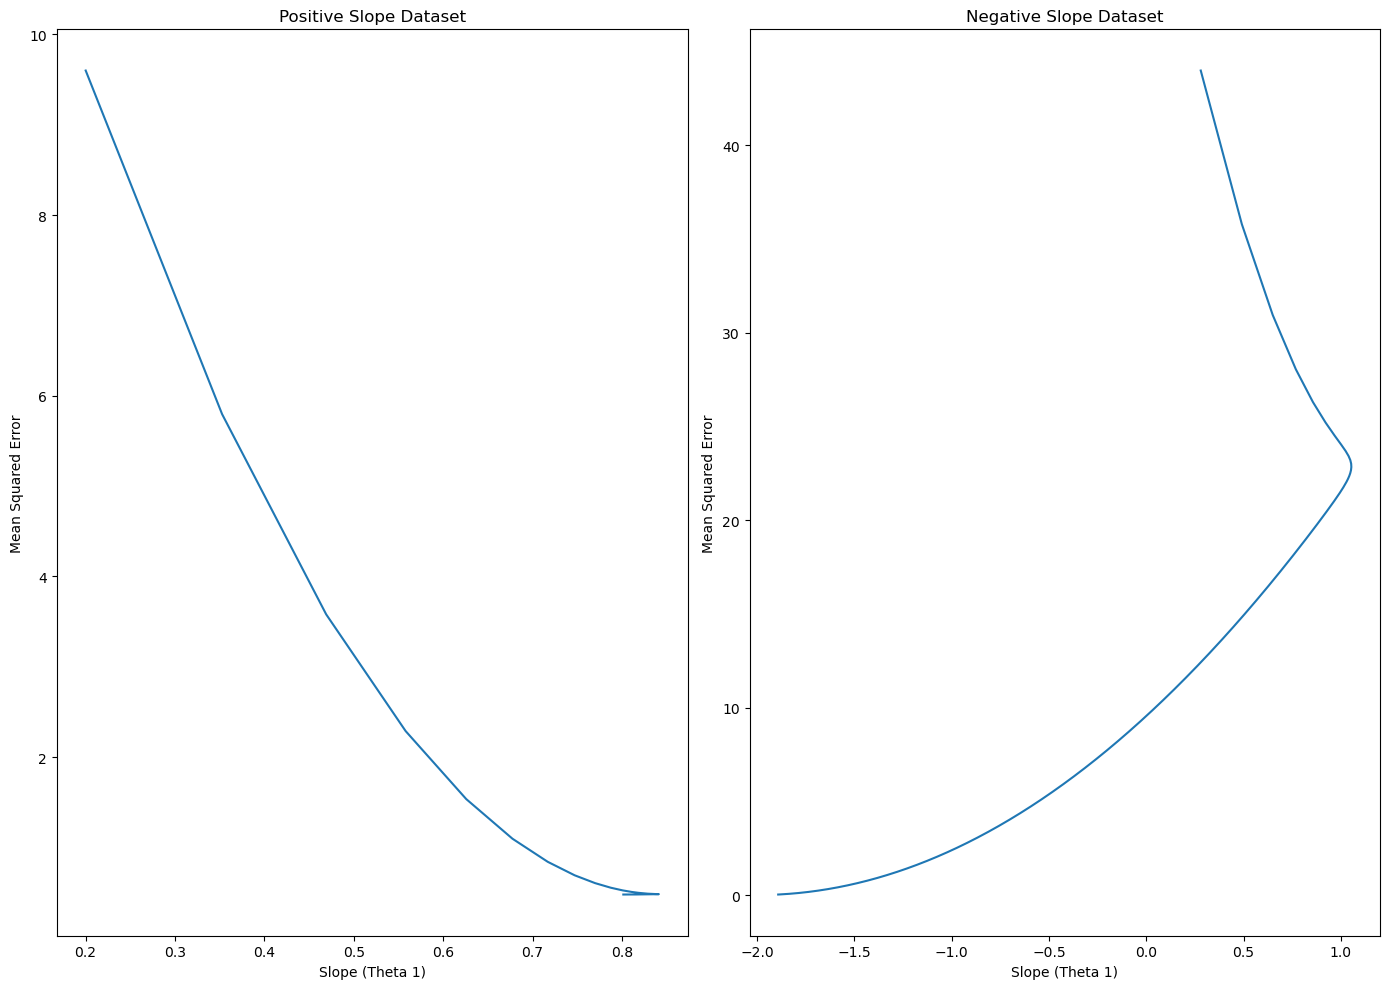

In [38]:
plt.figure(figsize=(14, 10))
plt.subplot(1, 2, 1)
plt.plot(theta_1_history_pos, mse_history_pos)
plt.xlabel('Slope (Theta 1)')
plt.ylabel('Mean Squared Error')
plt.title('Positive Slope Dataset')
plt.subplot(1, 2, 2)
plt.plot(theta_1_history_neg, mse_history_neg)
plt.xlabel('Slope (Theta 1)')
plt.ylabel('Mean Squared Error')
plt.title('Negative Slope Dataset')
plt.tight_layout()
plt.show()